In [1]:
#FIUBA - 75.26 Simulacion
#2C 2019 - Trabajo final
#79979 - Gonzalez, Juan Manuel (juanmg0511@gmail.com)

#A pseudo-random numbers generator based on a novel 3D chaotic map with an application to color image encryption
#https://doi.org/10.1007/s11071-018-4390-z
#3D piecewise-logistic map
#3D-PLM
#Sensibilidad a cambios en las condiciones iniciales

#Importación modulos y librerias
import numpy as np
import matplotlib.pyplot as plt

#Definición de parámetros de control: c1, c2, reales
#Como define el paper, c1=c2=20
c1 = 20
c2 = 20

#Implementación de funciones auxiliares
#Picewise map
def pMap(x):
    "piecewise map: funcion que dado x y un parametro de control real c1, calcula Ψ(x)"
    return (abs(1 - (c1 * x)))

#Logistic map
def lMap(x, y):
    "2D logistic map: funcion que dados x e y, y un parametro de control real c2, calcula Λ(x, y)"
    return (c2 * x * (1 - y))

#Implemantación del 3D piecewise-logistic map (3D-PLM), T
def tMap(x, y, z):
    "3D piecewise-logistic map: funcion que dados x, y, z, los paráetros de control reales c1 y c2, calcula T(x, y, z)"    
    x = (pMap(x) + lMap(y, z)) % 1
    y = (pMap(y) + lMap(z, x)) % 1
    z = (pMap(z) + lMap(x, y)) % 1
    
    return x, y, z

In [2]:
#Cantidad de iteraciones a calcular
it = 100
#Condiciones iniciales
x0 = 0.411
y0 = 0.321
z0 = 0.631
#Perturbación a introducir
delta = 10**(-6)
#Condiciones alteradas
x0_2 = 0.411 + delta
y0_2 = 0.321 + delta
z0_2 = 0.631 + delta

In [3]:
#Cálculo de las secuencias pseudo-aleatorias con ambos set de condiciones
secuencia = []
secuencia_2 = []
for i in range(it):
    
    if i == 0:
        secuencia.append(tMap(x0, y0, z0))
        secuencia_2.append(tMap(x0_2, y0_2, z0_2))
    else:
        secuencia.append(tMap(secuencia[i-1][0], secuencia[i-1][1], secuencia[i-1][2]))
        secuencia_2.append(tMap(secuencia_2[i-1][0], secuencia_2[i-1][1], secuencia_2[i-1][2]))
    
rx = [rx[0] for rx in secuencia]
ry = [ry[1] for ry in secuencia]
rz = [rz[2] for rz in secuencia]

rx_2 = [rx_2[0] for rx_2 in secuencia_2]
ry_2 = [ry_2[1] for ry_2 in secuencia_2]
rz_2 = [rz_2[2] for rz_2 in secuencia_2]

rx_dif = []
ry_dif = []
rz_dif = []
for i in range(it):
    rx_dif.append(rx_2[i] - rx[i])
    ry_dif.append(ry_2[i] - ry[i])
    rz_dif.append(rz_2[i] - rz[i])
    
x = list(range(0, it))

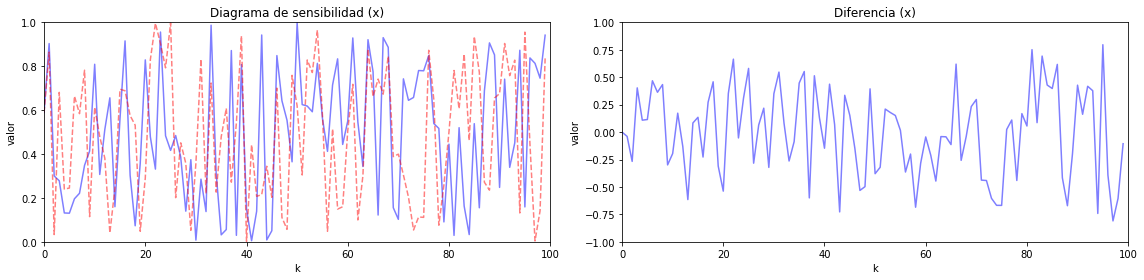

In [4]:
#Gráficos para componente x
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(x, rx, 'b', linestyle='-', alpha=.50)
ax1.plot(x, rx_2, 'r', linestyle='--', alpha=.50)
ax1.set_xlim(0, 100)
ax1.set_xlabel("k")
ax1.set_ylim(0,  1)
ax1.set_ylabel("valor")
ax1.set_title("Diagrama de sensibilidad (x)")

ax2.plot(x, rx_dif , 'b', linestyle='-', alpha=.50)
ax2.set_xlim(0, 100)
ax2.set_xlabel("k")
ax2.set_ylim(-1,  1)
ax2.set_ylabel("valor")
ax2.set_title("Diferencia (x)")

plt.tight_layout()

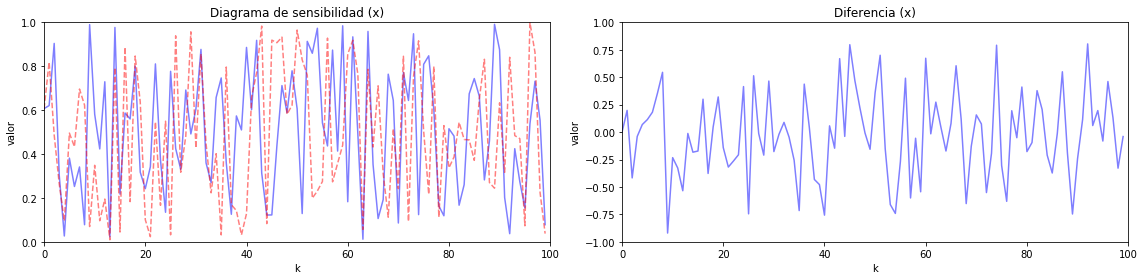

In [5]:
#Gráficos para componente y
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(x, ry, 'b', linestyle='-', alpha=.50)
ax1.plot(x, ry_2, 'r', linestyle='--', alpha=.50)
ax1.set_xlim(0, 100)
ax1.set_xlabel("k")
ax1.set_ylim(0,  1)
ax1.set_ylabel("valor")
ax1.set_title("Diagrama de sensibilidad (x)")

ax2.plot(x, ry_dif , 'b', linestyle='-', alpha=.50)
ax2.set_xlim(0, 100)
ax2.set_xlabel("k")
ax2.set_ylim(-1,  1)
ax2.set_ylabel("valor")
ax2.set_title("Diferencia (x)")

plt.tight_layout()

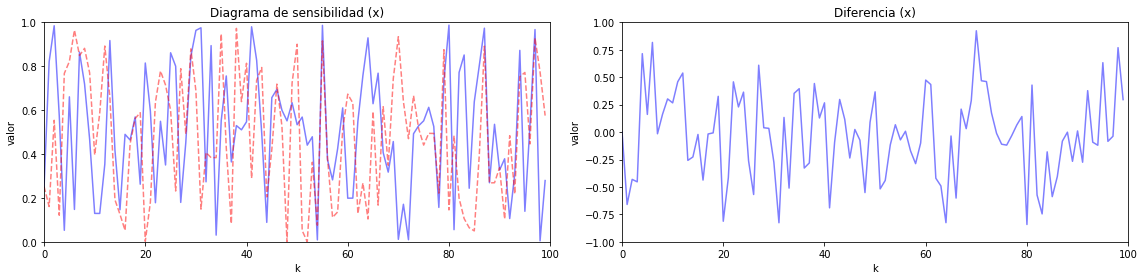

In [6]:
#Gráficos para componente z
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(x, rz, 'b', linestyle='-', alpha=.50)
ax1.plot(x, rz_2, 'r', linestyle='--', alpha=.50)
ax1.set_xlim(0, 100)
ax1.set_xlabel("k")
ax1.set_ylim(0,  1)
ax1.set_ylabel("valor")
ax1.set_title("Diagrama de sensibilidad (x)")

ax2.plot(x, rz_dif , 'b', linestyle='-', alpha=.50)
ax2.set_xlim(0, 100)
ax2.set_xlabel("k")
ax2.set_ylim(-1,  1)
ax2.set_ylabel("valor")
ax2.set_title("Diferencia (x)")

plt.tight_layout()